In [ ]:
import numpy as np
import pandas as pd
import cv2 
import glob
import os
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
#This Jupyter nb contains the code we have used for image pre-processing, for correcting illumination and doing
#contrast enhancement of the images. The following pre-processing techniques are applied in sequence-

# 1. Shades of Gray Transform
# 2. CLAHE (Contrast Limited Adaptive Histogram Equalziation)

In [ ]:
def shade_of_gray_cc(img, power=6, gamma=None):
    """
    img (numpy array): the original image with format of (h, w, c)
    power (int): the degree of norm, 6 is used in reference paper
    gamma (float): the value of gamma correction, 2.2 is used in reference paper
    """
    img_dtype = img.dtype

    if gamma is not None:
        img = img.astype('uint8')
        look_up_table = np.ones((256,1), dtype='uint8') * 0
        for i in range(256):
            look_up_table[i][0] = 255 * pow(i/255, 1/gamma)
        img = cv2.LUT(img, look_up_table)
        
    img = img.astype('float32')
    img_power = np.power(img, power)
    rgb_vec = np.power(np.mean(img_power, (0,1)), 1/power)
    rgb_norm = np.sqrt(np.sum(np.power(rgb_vec, 2.0)))
    rgb_vec = rgb_vec/rgb_norm
    rgb_vec = 1/(rgb_vec*np.sqrt(3))
    img = np.multiply(img, rgb_vec)

    img = np.clip(img, a_min=0, a_max=255)
    
    return img.astype(img_dtype)

In [ ]:
imgs_1 = glob.glob("folder path of the folder containing the images to be pre-processed. ")

(394, 394, 3)


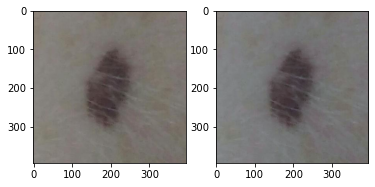

(221, 221, 3)


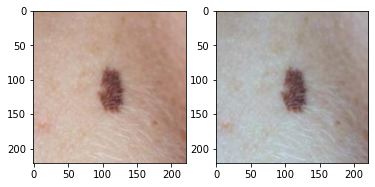

(1131, 1131, 3)


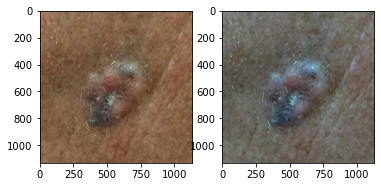

(740, 741, 3)


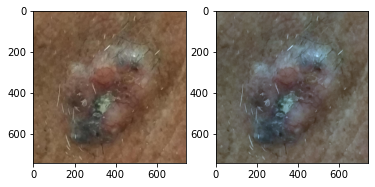

(1796, 1795, 3)


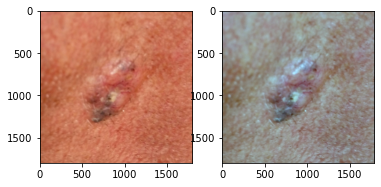

(1104, 1104, 3)


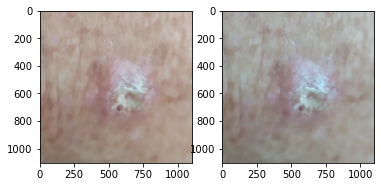

(1001, 1001, 3)


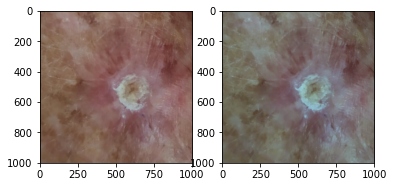

(715, 715, 3)


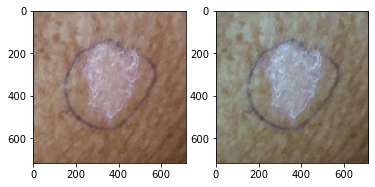

In [ ]:
#below are some visualizations on some images of pad ufes 20 with shades of gray transform applied. 

_n_samples = 8

for path in imgs_1[0:_n_samples]:
    _img = cv2.imread(path, cv2.IMREAD_COLOR)
    print(_img.shape)
    img = cv2.cvtColor(_img, cv2.COLOR_BGR2RGB)
    img_cc = shade_of_gray_cc (img)  
    _, (ax1,ax2) = plt.subplots(1, 2)
    ax1.imshow(img)
    ax2.imshow(img_cc)
    plt.show()

In [ ]:
def apply_cc (img_paths):
        
    for img_path in img_paths:
        print(img_path)
        img_name = img_path.split('\\')[-1]
        file_name= img_name.split('.')[0]
        img_ = cv2.imread(img_path, cv2.IMREAD_COLOR)
        np_img = shade_of_gray_cc(img_)            
        print(cv2.imwrite(os.path.join("enter file path of image to be saved" +".jpg"), np_img))

In [ ]:
apply_cc(imgs_1)

In [ ]:
def clahe(imgfolder_path, save_folder_path):
    imgs= glob.glob(imgfolder_path + "\*.jpg")
    for img_path in imgs:
        img = cv2.imread(img_path, 1)
        img_name= img_path.split('\\')[-1]
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB )

        #Converting image to LAB Color so CLAHE can be applied to the luminance channel
        lab_img= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

        #Splitting the LAB image to L, A and B channels, respectively
        l, a, b = cv2.split(lab_img)

        ###########Histogram Equlization#############
        #Apply histogram equalization to the L channel
        equ = cv2.equalizeHist(l)

        #Combine the Hist. equalized L-channel back with A and B channels
        updated_lab_img1 = cv2.merge((equ,a,b))

        #Convert LAB image back to color (RGB)
        hist_eq_img = cv2.cvtColor(updated_lab_img1, cv2.COLOR_LAB2BGR)

        ###########CLAHE#########################
        #Apply CLAHE to L channel
        clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(12,12))
        clahe_img = clahe.apply(l)

        #Combine the CLAHE enhanced L-channel back with A and B channels
        updated_lab_img2 = cv2.merge((clahe_img,a,b))

        #Convert LAB image back to color (RGB)
        CLAHE_img = cv2.cvtColor(updated_lab_img2, cv2.COLOR_LAB2RGB)

        # plt.imshow(img)
        # plt.imshow(hist_eq_img)
        #plt.imshow(CLAHE_img)
        cv2.imwrite(os.path.join(save_folder_path, img_name), CLAHE_img)

In [ ]:
clahe("folder path where images are stored after applying shades of gray transform", "folder path where images are to be stored after applying CLAHE" )